           run  elapsed_ms  ops_per_sec
0     baseline       96211          103
1     slow50ms      214358           46
2       loss10      127690           78
3  loss10_both      177576           56


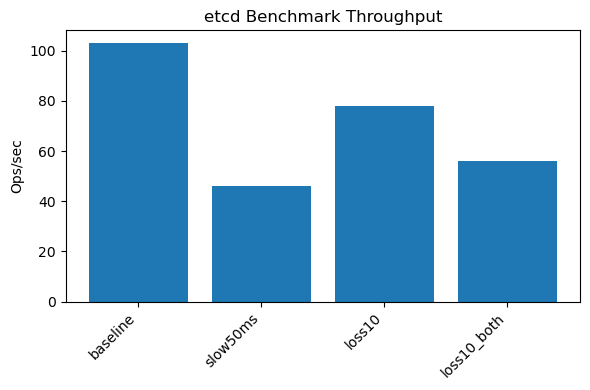

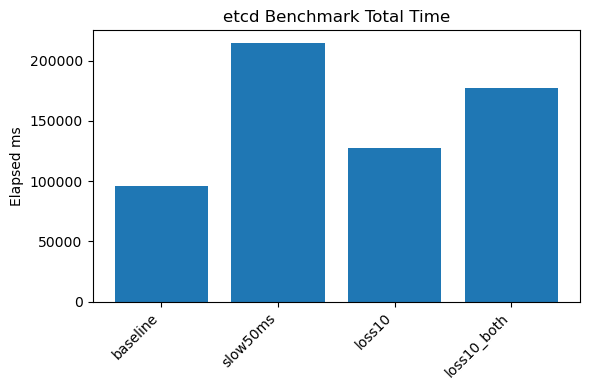

In [3]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# 1) Point this at your local hasil folder:
BASE_DIR = r"C:\hasil"

# 2) Gather data
records = []
for run_dir in sorted(os.listdir(BASE_DIR)):
    path = os.path.join(BASE_DIR, run_dir)
    log = os.path.join(path, "benchmark.log")
    if not os.path.isfile(log):
        continue
    # Strip off the timestamp prefix
    label = run_dir.split("_", 2)[-1]
    text = open(log).read()
    elapsed = re.search(r"elapsed_ms=(\d+)", text)
    rps     = re.search(r"throughput_ops_per_s=(\d+)", text)
    records.append({
        "run": label,
        "elapsed_ms": int(elapsed.group(1)) if elapsed else None,
        "ops_per_sec": int(rps.group(1))     if rps else None
    })

df = pd.DataFrame(records)

# 3) Show the DataFrame
print(df)

# 4) Plot throughput
plt.figure(figsize=(6,4))
plt.bar(df["run"], df["ops_per_sec"])
plt.ylabel("Ops/sec")
plt.title("etcd Benchmark Throughput")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 5) Plot elapsed time
plt.figure(figsize=(6,4))
plt.bar(df["run"], df["elapsed_ms"])
plt.ylabel("Elapsed ms")
plt.title("etcd Benchmark Total Time")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


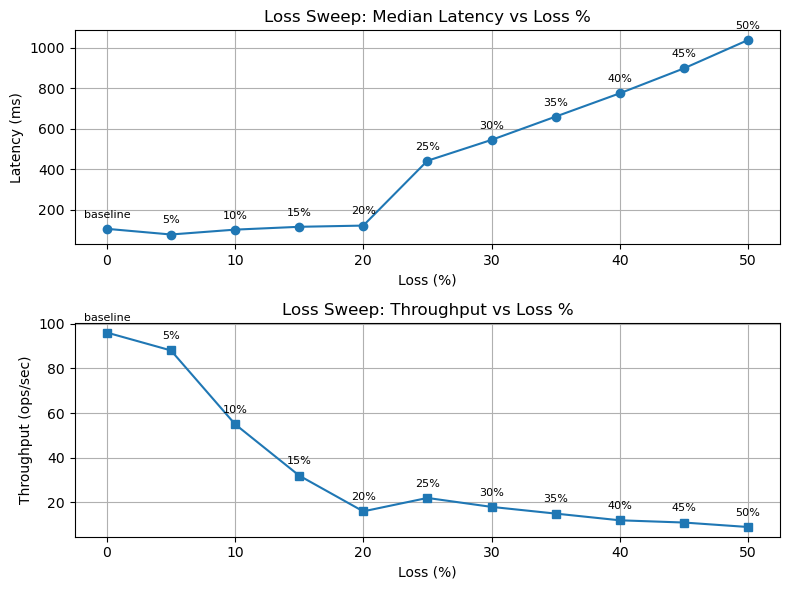

In [27]:
#!/usr/bin/env python3
import os, glob
import matplotlib.pyplot as plt

BASE_DIR       = r"C:\etcd_bench_results"
FOLDER_KEYS    = ["baseline"] + [f"loss{n}"  for n in range(5, 55, 5)]
DISPLAY_LABELS = ["baseline"] + [f"{n}%"      for n in range(5, 55, 5)]

def find_latest_run(key):
    pattern = os.path.join(BASE_DIR, f"*_{key}")
    runs = sorted(glob.glob(pattern))
    return runs[-1] if runs else None

def load_summary(key):
    rd = find_latest_run(key)
    if rd is None:
        raise RuntimeError(f"No run folder for '{key}'")
    lat = tp = None
    with open(os.path.join(rd, "benchmark.log")) as f:
        for line in f:
            if line.startswith("Latency median"):
                lat = float(line.split(":")[1].split()[0])
            elif line.startswith("Throughput"):
                tp  = float(line.split(":")[1].split()[0])
    if lat is None or tp is None:
        raise RuntimeError(f"Incomplete data in {rd}")
    return lat, tp

# build X / Y
x_vals      = [0] + list(range(5, 55, 5))
latencies   = []
throughputs = []

for key in FOLDER_KEYS:
    lat, tp = load_summary(key)
    latencies.append(lat)
    throughputs.append(tp)

# plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), tight_layout=True)

# Latency curve
ax1.plot(x_vals, latencies, marker='o', linestyle='-')
ax1.set_title("Loss Sweep: Median Latency vs Loss %")
ax1.set_xlabel("Loss (%)")
ax1.set_ylabel("Latency (ms)")
ax1.grid(True)
# annotate
for x, y, lbl in zip(x_vals, latencies, DISPLAY_LABELS):
    ax1.annotate(lbl, (x, y),
                 textcoords="offset points", xytext=(0,8),
                 ha='center', fontsize=8)

# Throughput curve
ax2.plot(x_vals, throughputs, marker='s', linestyle='-')
ax2.set_title("Loss Sweep: Throughput vs Loss %")
ax2.set_xlabel("Loss (%)")
ax2.set_ylabel("Throughput (ops/sec)")
ax2.grid(True)
for x, y, lbl in zip(x_vals, throughputs, DISPLAY_LABELS):
    ax2.annotate(lbl, (x, y),
                 textcoords="offset points", xytext=(0,8),
                 ha='center', fontsize=8)

plt.show()


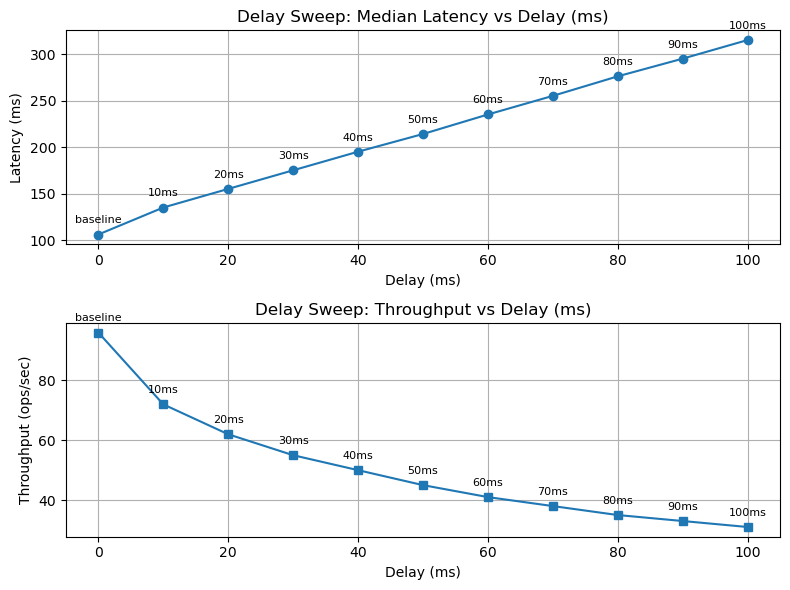

In [29]:
#!/usr/bin/env python3
import os, glob
import matplotlib.pyplot as plt

BASE_DIR       = r"C:\etcd_bench_results"
FOLDER_KEYS    = ["baseline"] + [f"delay{n}" for n in range(10, 110, 10)]
DISPLAY_LABELS = ["baseline"] + [f"{n}ms"     for n in range(10, 110, 10)]

def find_latest_run(key):
    pattern = os.path.join(BASE_DIR, f"*_{key}")
    runs = sorted(glob.glob(pattern))
    return runs[-1] if runs else None

def load_summary(key):
    rd = find_latest_run(key)
    if rd is None:
        raise RuntimeError(f"No run folder for '{key}'")
    lat = tp = None
    with open(os.path.join(rd, "benchmark.log")) as f:
        for line in f:
            if line.startswith("Latency median"):
                lat = float(line.split(":")[1].split()[0])
            elif line.startswith("Throughput"):
                tp  = float(line.split(":")[1].split()[0])
    if lat is None or tp is None:
        raise RuntimeError(f"Incomplete data in {rd}")
    return lat, tp

# build X / Y
x_vals      = [0] + list(range(10, 110, 10))
latencies   = []
throughputs = []

for key in FOLDER_KEYS:
    lat, tp = load_summary(key)
    latencies.append(lat)
    throughputs.append(tp)

# plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), tight_layout=True)

# Latency curve
ax1.plot(x_vals, latencies, marker='o', linestyle='-')
ax1.set_title("Delay Sweep: Median Latency vs Delay (ms)")
ax1.set_xlabel("Delay (ms)")
ax1.set_ylabel("Latency (ms)")
ax1.grid(True)
for x, y, lbl in zip(x_vals, latencies, DISPLAY_LABELS):
    ax1.annotate(lbl, (x, y),
                 textcoords="offset points", xytext=(0,8),
                 ha='center', fontsize=8)

# Throughput curve
ax2.plot(x_vals, throughputs, marker='s', linestyle='-')
ax2.set_title("Delay Sweep: Throughput vs Delay (ms)")
ax2.set_xlabel("Delay (ms)")
ax2.set_ylabel("Throughput (ops/sec)")
ax2.grid(True)
for x, y, lbl in zip(x_vals, throughputs, DISPLAY_LABELS):
    ax2.annotate(lbl, (x, y),
                 textcoords="offset points", xytext=(0,8),
                 ha='center', fontsize=8)

plt.show()


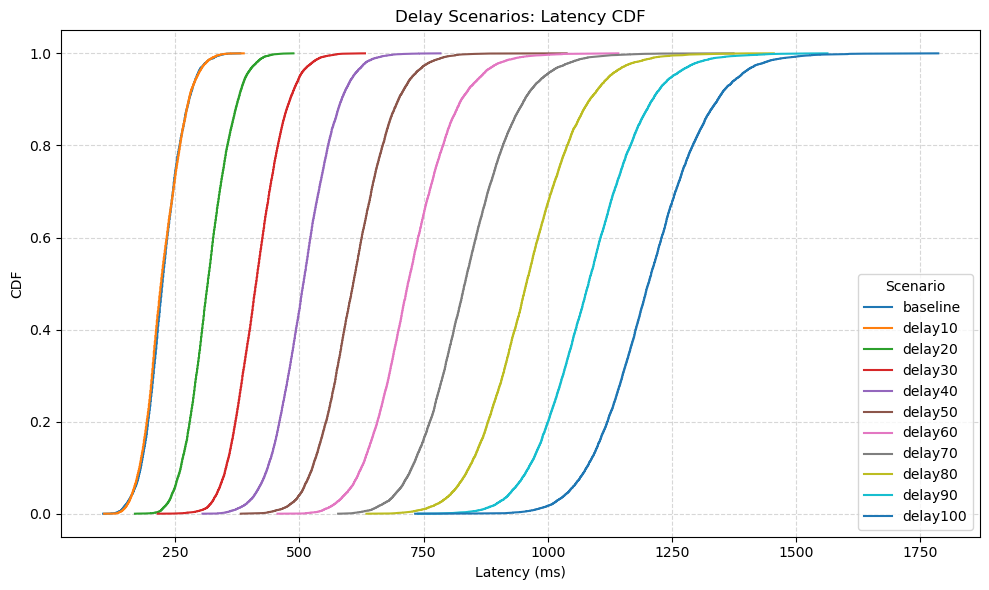

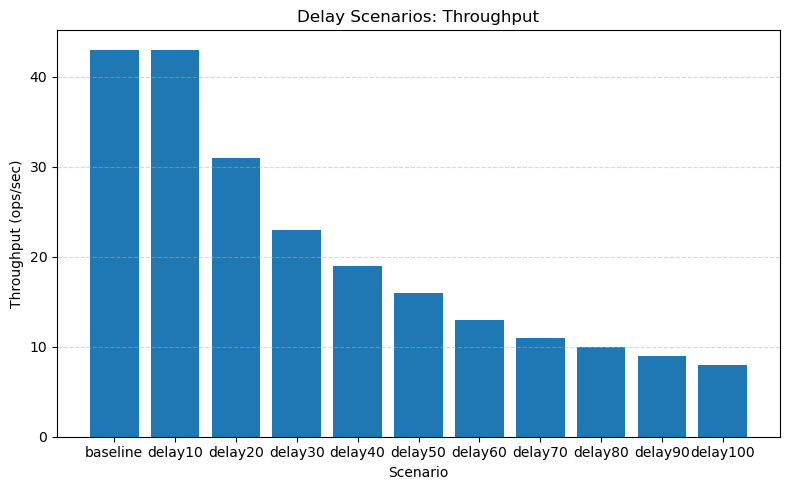

In [41]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Base path
base_dir = r"C:\martin"

# Define scenarios: baseline + delay10, delay20, …, delay100
delay_values = list(range(10, 101, 10))
scenarios = ["baseline"] + [f"delay{v}" for v in delay_values]

cdf_data = {}
throughput_data = {}

for sc in scenarios:
    # match folders like *_baseline, *_delay10, etc.
    pattern = os.path.join(base_dir, f"*_{sc}")
    matches = glob.glob(pattern)
    if not matches:
        print(f"⚠️ Skipping missing scenario: {sc}")
        continue
    run_dir = sorted(matches)[-1]

    # — Load latencies and build CDF
    lat_file = os.path.join(run_dir, "latencies_ms.log")
    if os.path.isfile(lat_file):
        latencies = np.array(
            [int(line.strip()) for line in open(lat_file) if line.strip().isdigit()]
        )
        lat_sorted = np.sort(latencies)
        cdf = np.arange(1, len(lat_sorted)+1) / len(lat_sorted)
        cdf_data[sc] = (lat_sorted, cdf)
    else:
        print(f"⚠️ No latencies_ms.log in {run_dir}")

    # — Load throughput from metadata.txt
    meta_file = os.path.join(run_dir, "metadata.txt")
    if os.path.isfile(meta_file):
        with open(meta_file) as f:
            for line in f:
                if line.startswith("throughput_ops_per_s"):
                    throughput_data[sc] = float(line.split("=",1)[1].strip())
                    break
    else:
        print(f"⚠️ No metadata.txt in {run_dir}")

# ---- Plot Latency CDF ----
plt.figure(figsize=(10,6))
for sc, (lat, cdf) in cdf_data.items():
    plt.plot(lat, cdf, label=sc)
plt.title("Delay Scenarios: Latency CDF")
plt.xlabel("Latency (ms)")
plt.ylabel("CDF")
plt.legend(title="Scenario")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ---- Plot Throughput Bar Chart ----
plt.figure(figsize=(8,5))
labels = list(throughput_data.keys())
values = [throughput_data[k] for k in labels]
plt.bar(labels, values)
plt.title("Delay Scenarios: Throughput")
plt.xlabel("Scenario")
plt.ylabel("Throughput (ops/sec)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


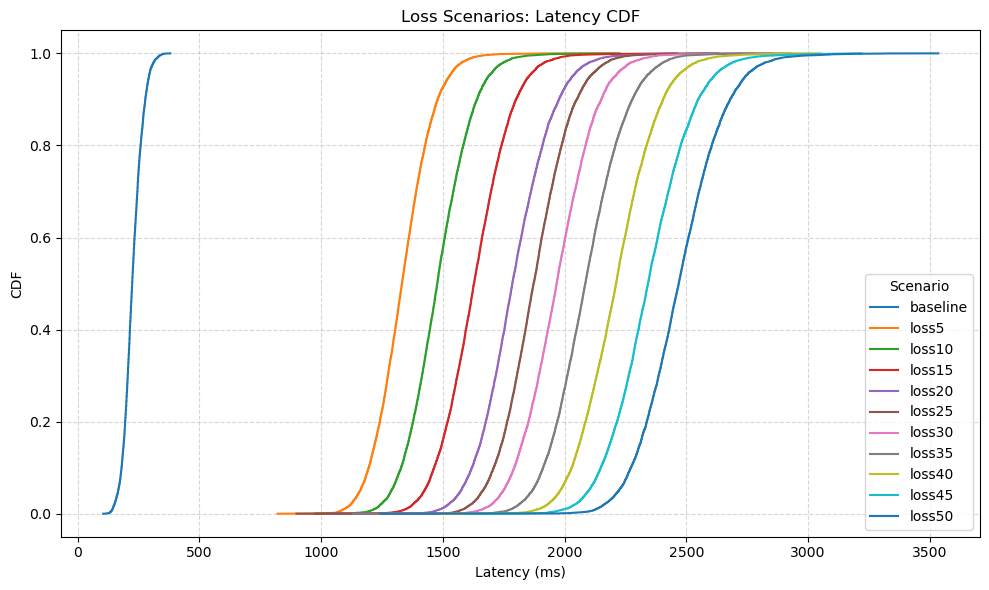

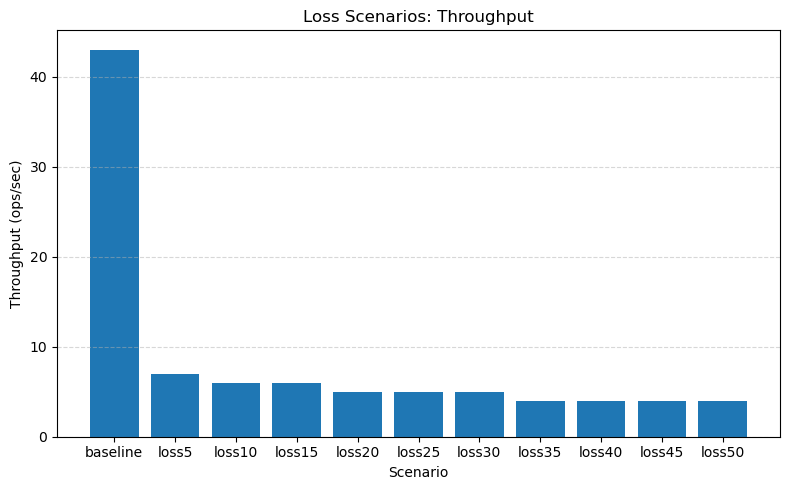

In [43]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Base path
base_dir = r"C:\martin"

# Define scenarios: baseline + loss5, loss10, …, loss50
loss_values = list(range(5, 51, 5))
scenarios = ["baseline"] + [f"loss{v}" for v in loss_values]

cdf_data = {}
throughput_data = {}

for sc in scenarios:
    # match folders like *_baseline, *_loss5, etc.
    pattern = os.path.join(base_dir, f"*_{sc}")
    matches = glob.glob(pattern)
    if not matches:
        print(f"⚠️ Skipping missing scenario: {sc}")
        continue
    run_dir = sorted(matches)[-1]

    # — Load latencies and build CDF
    lat_file = os.path.join(run_dir, "latencies_ms.log")
    if os.path.isfile(lat_file):
        latencies = np.array(
            [int(line.strip()) for line in open(lat_file) if line.strip().isdigit()]
        )
        lat_sorted = np.sort(latencies)
        cdf = np.arange(1, len(lat_sorted)+1) / len(lat_sorted)
        cdf_data[sc] = (lat_sorted, cdf)
    else:
        print(f"⚠️ No latencies_ms.log in {run_dir}")

    # — Load throughput from metadata.txt
    meta_file = os.path.join(run_dir, "metadata.txt")
    if os.path.isfile(meta_file):
        with open(meta_file) as f:
            for line in f:
                if line.startswith("throughput_ops_per_s"):
                    throughput_data[sc] = float(line.split("=",1)[1].strip())
                    break
    else:
        print(f"⚠️ No metadata.txt in {run_dir}")

# ---- Plot Latency CDF ----
plt.figure(figsize=(10,6))
for sc, (lat, cdf) in cdf_data.items():
    plt.plot(lat, cdf, label=sc)
plt.title("Loss Scenarios: Latency CDF")
plt.xlabel("Latency (ms)")
plt.ylabel("CDF")
plt.legend(title="Scenario")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ---- Plot Throughput Bar Chart ----
plt.figure(figsize=(8,5))
labels = list(throughput_data.keys())
values = [throughput_data[k] for k in labels]
plt.bar(labels, values)
plt.title("Loss Scenarios: Throughput")
plt.xlabel("Scenario")
plt.ylabel("Throughput (ops/sec)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


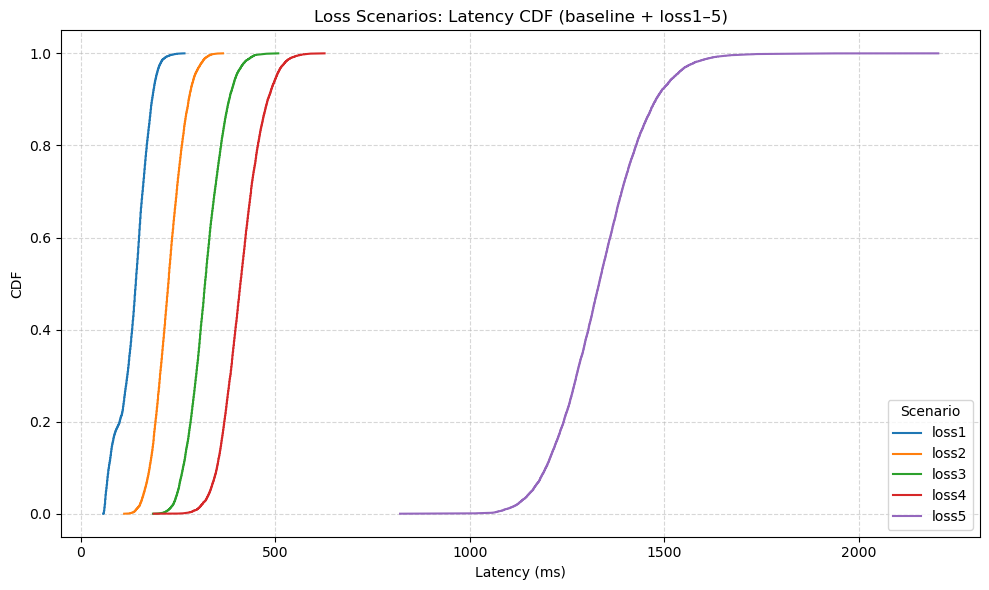

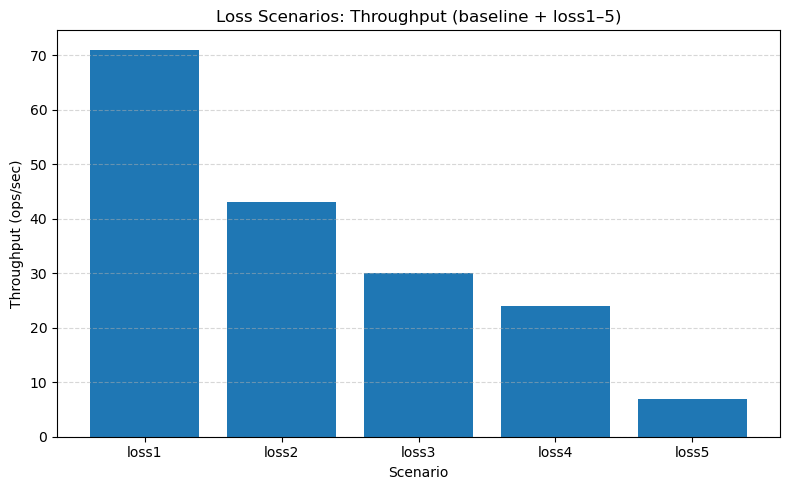

In [3]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Base path on your local machine
base_dir = r"C:\martin"

# Scenarios: baseline + loss1, loss2, loss3, loss4, loss5
scenarios = [f"loss{v}" for v in range(1, 6)]

cdf_data = {}
throughput_data = {}

for sc in scenarios:
    # match folders ending in _baseline or _lossX
    pattern = os.path.join(base_dir, f"*_{sc}")
    matches = glob.glob(pattern)
    if not matches:
        print(f"⚠️ Skipping missing scenario: {sc}")
        continue
    run_dir = sorted(matches)[-1]

    # — Load latencies and build CDF
    lat_file = os.path.join(run_dir, "latencies_ms.log")
    if os.path.isfile(lat_file):
        latencies = np.array(
            [int(line.strip()) for line in open(lat_file) if line.strip().isdigit()]
        )
        lat_sorted = np.sort(latencies)
        cdf = np.arange(1, len(lat_sorted) + 1) / len(lat_sorted)
        cdf_data[sc] = (lat_sorted, cdf)
    else:
        print(f"⚠️ No latencies_ms.log in {run_dir}")

    # — Load throughput from metadata.txt
    meta_file = os.path.join(run_dir, "metadata.txt")
    if os.path.isfile(meta_file):
        with open(meta_file) as f:
            for line in f:
                if line.startswith("throughput_ops_per_s"):
                    throughput_data[sc] = float(line.split("=", 1)[1].strip())
                    break
    else:
        print(f"⚠️ No metadata.txt in {run_dir}")

# ---- Plot Latency CDF ----
plt.figure(figsize=(10, 6))
for sc, (lat, cdf) in cdf_data.items():
    plt.plot(lat, cdf, label=sc)
plt.title("Loss Scenarios: Latency CDF (baseline + loss1–5)")
plt.xlabel("Latency (ms)")
plt.ylabel("CDF")
plt.legend(title="Scenario")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ---- Plot Throughput Bar Chart ----
plt.figure(figsize=(8, 5))
labels = list(throughput_data.keys())
values = [throughput_data[k] for k in labels]
plt.bar(labels, values)
plt.title("Loss Scenarios: Throughput (baseline + loss1–5)")
plt.xlabel("Scenario")
plt.ylabel("Throughput (ops/sec)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


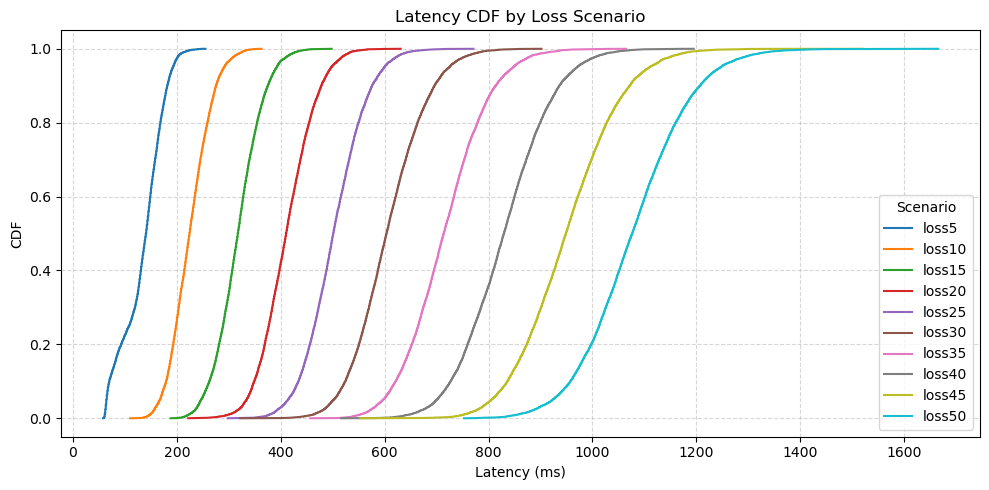

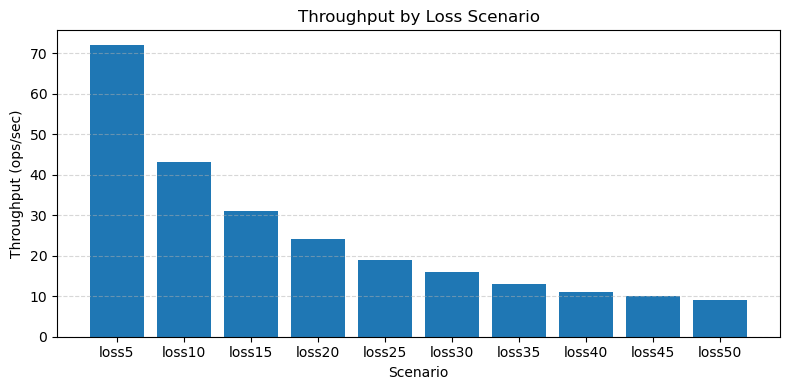

In [5]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Base path where you copied the results
base_dir = r"C:\new-results"

# Find all loss scenario directories
dirs = sorted(glob.glob(os.path.join(base_dir, "*_loss*")))

# Prepare containers
cdf_data = {}
throughput_data = {}

for d in dirs:
    label = os.path.basename(d).split('_')[-1]  # e.g. "loss5"
    lat_file = os.path.join(d, "latencies_ms.log")
    meta_file = os.path.join(d, "metadata.txt")

    # Load latencies → build CDF
    if os.path.isfile(lat_file):
        latencies = np.array(
            [int(line.strip()) for line in open(lat_file) if line.strip().isdigit()]
        )
        lat_sorted = np.sort(latencies)
        cdf = np.arange(1, len(lat_sorted) + 1) / len(lat_sorted)
        cdf_data[label] = (lat_sorted, cdf)
    else:
        print(f"⚠️ No latencies in {d}")

    # Load throughput
    if os.path.isfile(meta_file):
        with open(meta_file) as f:
            for line in f:
                if line.startswith("throughput_ops_per_s"):
                    throughput_data[label] = float(line.split("=", 1)[1].strip())
                    break
    else:
        print(f"⚠️ No metadata in {d}")

# ─── Plot Latency CDF ───
plt.figure(figsize=(10, 5))
for label, (lat, cdf) in cdf_data.items():
    plt.plot(lat, cdf, label=label)
plt.title("Latency CDF by Loss Scenario")
plt.xlabel("Latency (ms)")
plt.ylabel("CDF")
plt.legend(title="Scenario")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# ─── Plot Throughput Bar Chart ───
plt.figure(figsize=(8, 4))
labels = list(throughput_data.keys())
values = [throughput_data[k] for k in labels]
plt.bar(labels, values)
plt.title("Throughput by Loss Scenario")
plt.xlabel("Scenario")
plt.ylabel("Throughput (ops/sec)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.show()


Saved combined plot to C:\mid-fault\all_midfaults_throughput.png


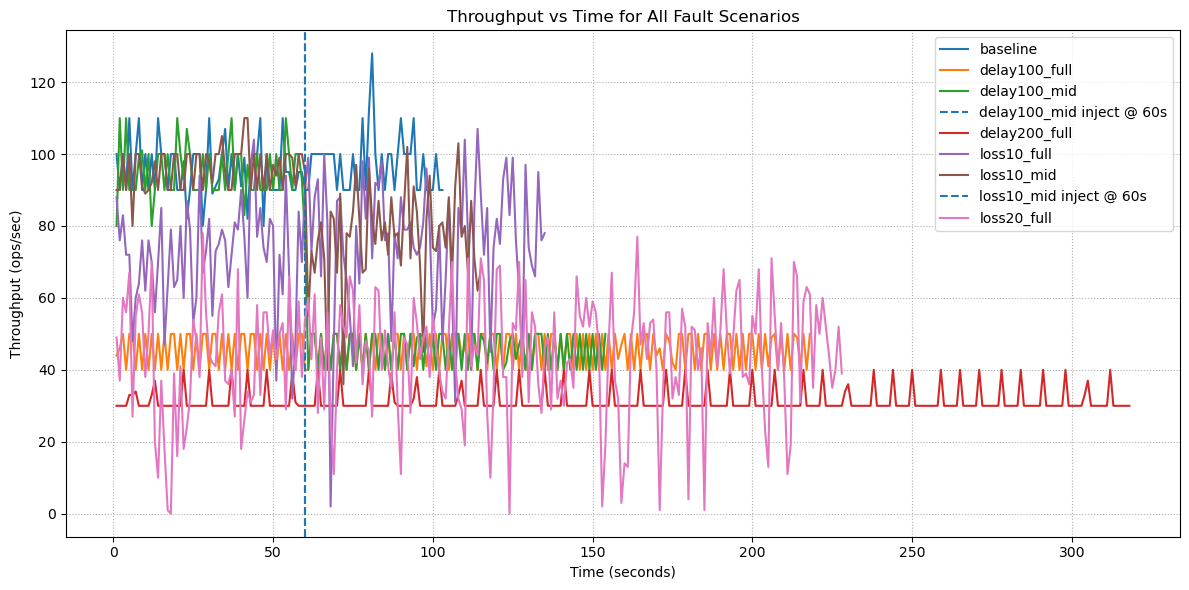

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1) Configure runs with label, CSV path, and inject time (s)
runs = [
    ("baseline", r"C:\mid-fault\20250727_195003_baseline\throughput.csv", 0),
    ("delay100_full", r"C:\mid-fault\20250727_195202_delay100_full\throughput.csv", 0),
    ("delay100_mid", r"C:\mid-fault\20250727_195554_delay100_mid\throughput.csv", 60),
    ("delay200_full", r"C:\mid-fault\20250727_195837_delay200_full\throughput.csv", 0),
    ("loss10_full", r"C:\mid-fault\20250727_200410_loss10_full\throughput.csv", 0),
    ("loss10_mid", r"C:\mid-fault\20250727_200645_loss10_mid\throughput.csv", 60),
    ("loss20_full", r"C:\mid-fault\20250727_200941_loss20_full\throughput.csv", 0),
]

plt.figure(figsize=(12, 6))

for label, path, inject in runs:
    if not os.path.isfile(path):
        print(f"Warning: {path} not found, skipping {label}")
        continue
    df = pd.read_csv(path)  # expects columns "second" and "ops"
    plt.plot(df['second'], df['ops'], label=label)
    if inject > 0:
        plt.axvline(inject, linestyle='--', label=f"{label} inject @ {inject}s")

plt.title("Throughput vs Time for All Fault Scenarios")
plt.xlabel("Time (seconds)")
plt.ylabel("Throughput (ops/sec)")
plt.grid(linestyle=':')
plt.legend()
plt.tight_layout()

# Save and show
out_file = r"C:\mid-fault\all_midfaults_throughput.png"
plt.savefig(out_file, dpi=150)
print(f"Saved combined plot to {out_file}")
plt.show()

Saved smoothed plot to C:\mid-fault\all_midfaults_smoothed.png


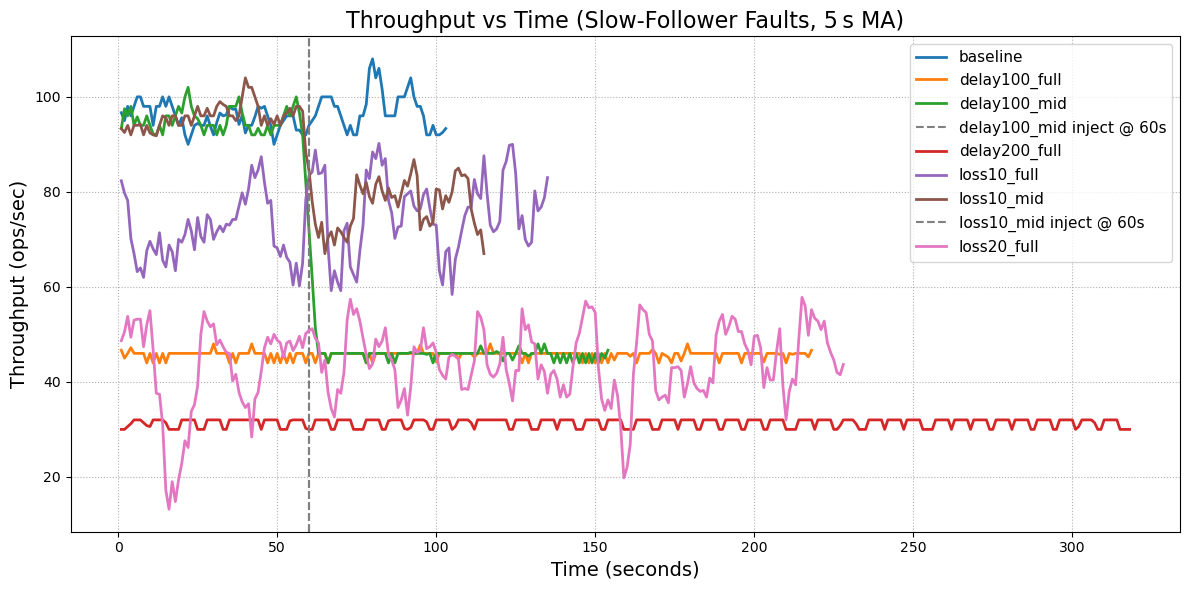

In [21]:
#!/usr/bin/env python3
import os
import pandas as pd
import matplotlib.pyplot as plt

# ──────────────────────────────────────────────────────────────────────────────
# Configuration: list of (label, path to throughput.csv, inject_at_seconds)
runs = [
    ("baseline",         r"C:\mid-fault\20250727_195003_baseline\throughput.csv",      0),
    ("delay100_full",    r"C:\mid-fault\20250727_195202_delay100_full\throughput.csv", 0),
    ("delay100_mid",     r"C:\mid-fault\20250727_195554_delay100_mid\throughput.csv",  60),
    ("delay200_full",    r"C:\mid-fault\20250727_195837_delay200_full\throughput.csv", 0),
    ("loss10_full",      r"C:\mid-fault\20250727_200410_loss10_full\throughput.csv",   0),
    ("loss10_mid",       r"C:\mid-fault\20250727_200645_loss10_mid\throughput.csv",    60),
    ("loss20_full",      r"C:\mid-fault\20250727_200941_loss20_full\throughput.csv",   0),
]
SMOOTH_WINDOW = 5   # seconds for moving average
OUT_PNG = r"C:\mid-fault\all_midfaults_smoothed.png"
# ──────────────────────────────────────────────────────────────────────────────

def smooth(series, window):
    """Return a centered moving average of `series` with given window size."""
    return series.rolling(window=window, min_periods=1, center=True).mean()

def main():
    plt.figure(figsize=(12, 6))
    for label, csv_path, inject in runs:
        if not os.path.isfile(csv_path):
            print(f"[WARN] Missing {csv_path}, skipping {label}")
            continue

        # load per-second ops/sec
        df = pd.read_csv(csv_path)  # columns: second, ops
        df = df.sort_values("second")
        df["smoothed"] = smooth(df["ops"], SMOOTH_WINDOW)

        # plot smoothed throughput
        plt.plot(
            df["second"],
            df["smoothed"],
            linewidth=2,
            label=label
        )

        # mark injection time
        if inject > 0:
            plt.axvline(
                inject,
                color="gray",
                linestyle="--",
                linewidth=1.5,
                label=f"{label} inject @ {inject}s"
            )

    plt.title("Throughput vs Time (Slow‑Follower Faults, 5 s MA)", fontsize=16)
    plt.xlabel("Time (seconds)", fontsize=14)
    plt.ylabel("Throughput (ops/sec)", fontsize=14)
    plt.grid(linestyle=":")
    plt.legend(fontsize=11, loc="upper right")
    plt.tight_layout()

    # save and show
    plt.savefig(OUT_PNG, dpi=150)
    print(f"Saved smoothed plot to {OUT_PNG}")
    plt.show()

if __name__ == "__main__":
    main()


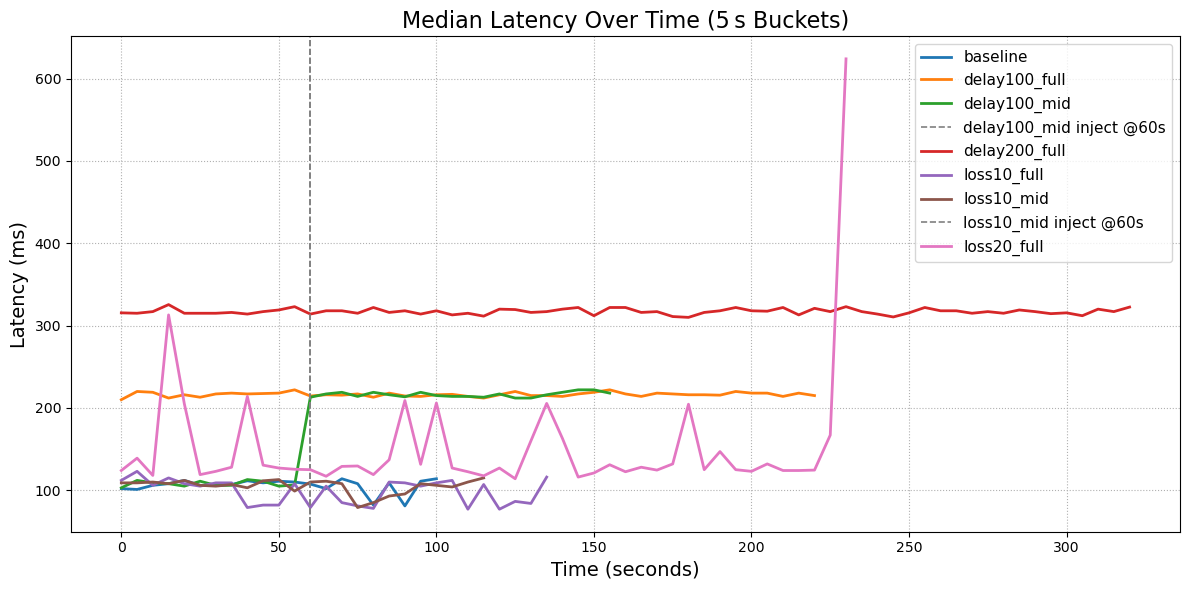

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Configure your runs: (label, path to latency.log, inject_at_seconds) ---
runs = [
    ("baseline",        r"C:\mid-fault\20250727_195003_baseline\latency.log",      0),
    ("delay100_full",   r"C:\mid-fault\20250727_195202_delay100_full\latency.log", 0),
    ("delay100_mid",    r"C:\mid-fault\20250727_195554_delay100_mid\latency.log",  60),
    ("delay200_full",   r"C:\mid-fault\20250727_195837_delay200_full\latency.log", 0),
    ("loss10_full",     r"C:\mid-fault\20250727_200410_loss10_full\latency.log",   0),
    ("loss10_mid",      r"C:\mid-fault\20250727_200645_loss10_mid\latency.log",    60),
    ("loss20_full",     r"C:\mid-fault\20250727_200941_loss20_full\latency.log",   0),
]

# Rolling window size (seconds) for grouping
WINDOW = 5

plt.figure(figsize=(12, 6))
plt.title("Median Latency Over Time (5 s Buckets)", fontsize=16)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Latency (ms)", fontsize=14)
plt.grid(linestyle=":")

for label, path, inject in runs:
    try:
        # load end‐ms,tlatency‐ms lines
        df = pd.read_csv(path, header=None, names=["end_ms", "lat_ms"])
    except Exception as e:
        print(f"[WARN] skipping {label}: {e}")
        continue

    # compute relative time in seconds
    start_s = df["end_ms"].iat[0] / 1000.0
    df["time_s"] = df["end_ms"] / 1000.0 - start_s

    # bucket into WINDOW‐second intervals
    df["bucket"] = (df["time_s"] // WINDOW) * WINDOW

    # median (p50) per bucket
    med = df.groupby("bucket")["lat_ms"].median().reset_index()

    # plot
    plt.plot(med["bucket"], med["lat_ms"], label=label, linewidth=2)

    # inject marker
    if inject > 0:
        plt.axvline(inject, color="gray", linestyle="--", linewidth=1.2,
                    label=f"{label} inject @{inject}s")

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

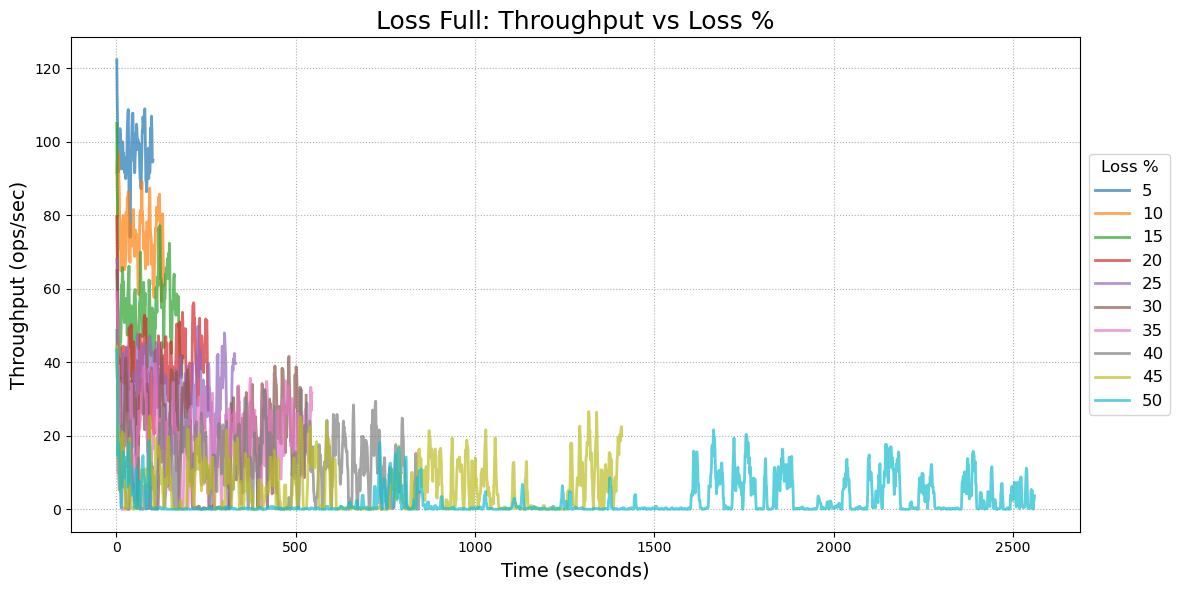

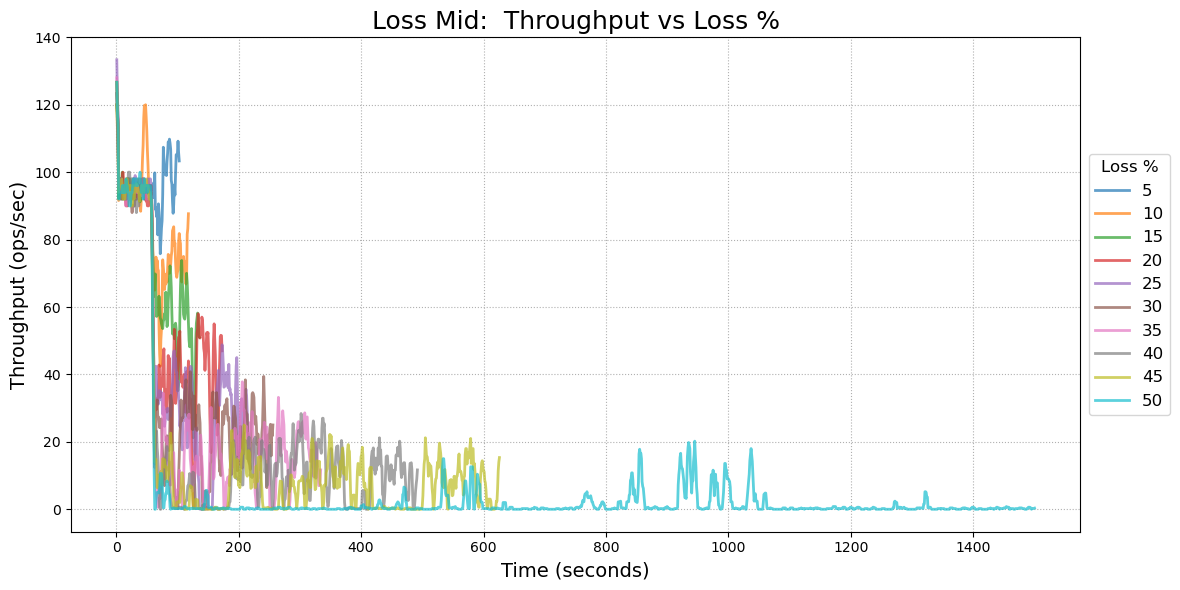

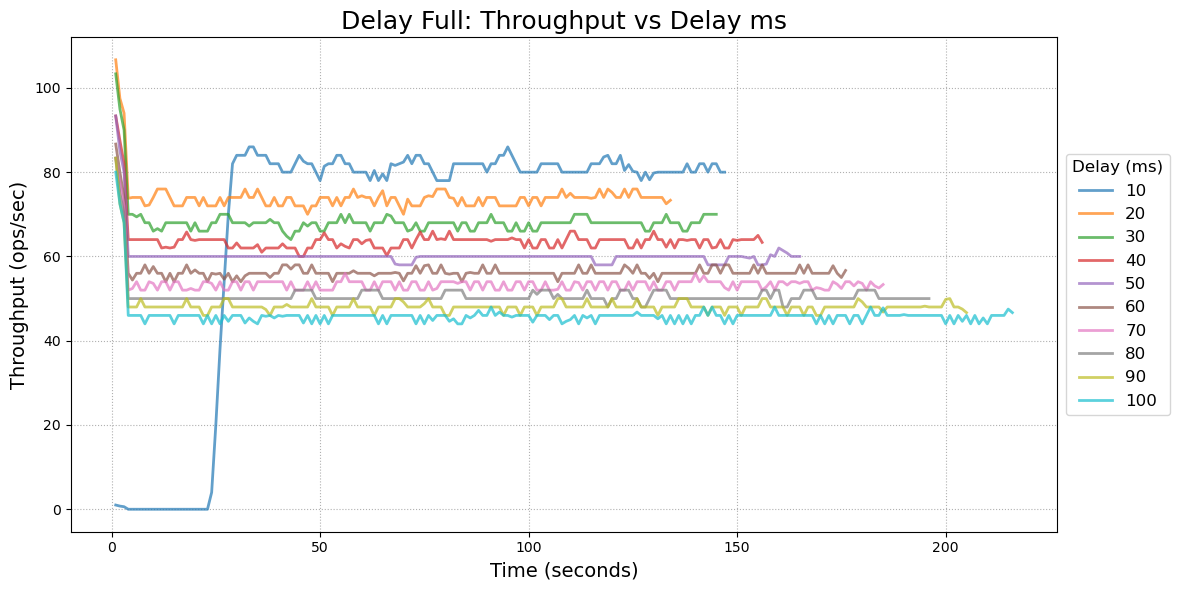

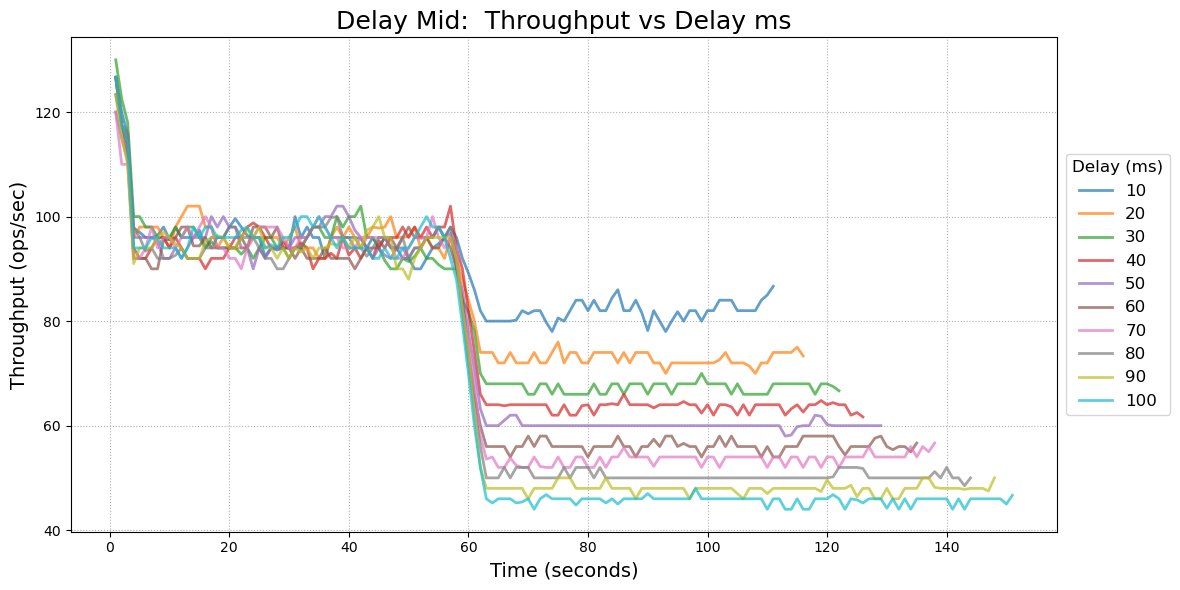

In [7]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps

# ──────────────────────────────────────────────────────────────────────────────
BASE_DIR      = r"C:\Newer-fault"
SMOOTH_WINDOW = 5   # seconds for moving average

# Sweep specs: (regex, x‑label, title)
SWEEPS = [
    (r".*_loss(\d+)_full$",  "Loss %",    "Loss Full: Throughput vs Loss %"),
    (r".*_loss(\d+)_mid$",   "Loss %",    "Loss Mid:  Throughput vs Loss %"),
    (r".*_delay(\d+)_full$", "Delay (ms)", "Delay Full: Throughput vs Delay ms"),
    (r".*_delay(\d+)_mid$",  "Delay (ms)", "Delay Mid:  Throughput vs Delay ms"),
]
# ──────────────────────────────────────────────────────────────────────────────

def smooth(series, window):
    return series.rolling(window=window, min_periods=1, center=True).mean()

def load_sweep(pattern):
    regex = re.compile(pattern)
    runs = []
    for d in os.listdir(BASE_DIR):
        m = regex.match(d)
        if not m:
            continue
        param = int(m.group(1))
        csv_path = os.path.join(BASE_DIR, d, "throughput.csv")
        if not os.path.isfile(csv_path):
            continue
        df = pd.read_csv(csv_path).sort_values("second")
        df["smoothed"] = smooth(df["ops"], SMOOTH_WINDOW)
        runs.append((param, df))
    return sorted(runs, key=lambda x: x[0])

for pattern, xlabel, title in SWEEPS:
    sweep = load_sweep(pattern)
    if not sweep:
        print(f"[WARN] no runs for {pattern}")
        continue

    fig, ax = plt.subplots(figsize=(14, 6))
    cmap = colormaps["tab10"].resampled(len(sweep))  # new API

    for idx, (param, df) in enumerate(sweep):
        ax.plot(
            df["second"],
            df["smoothed"],
            label=str(param),
            alpha=0.7,
            linewidth=2,
            color=cmap(idx)
        )

    ax.set_title(title, fontsize=18)
    ax.set_xlabel("Time (seconds)", fontsize=14)
    ax.set_ylabel("Throughput (ops/sec)", fontsize=14)
    ax.grid(linestyle=":")

    ax.legend(
        title=xlabel,
        fontsize=12,
        title_fontsize=12,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        ncol=1
    )
    fig.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()
